<a href="https://colab.research.google.com/github/pratik1208/HealthProPred/blob/main/Frequency_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
df= pd.read_csv("/content/drive/MyDrive/Doceree-HCP_Train.csv",encoding='latin-1')

In [54]:
df.columns

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS', 'TAXONOMY', 'IS_HCP'],
      dtype='object')

In [55]:
df.shape

(113937, 14)

In [56]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [57]:
df['KEYWORDS'] =df['KEYWORDS'].str.lower()

In [58]:
# data = df[['DEVICETYPE','USERCITY','USERZIPCODE','USERAGENT','PLATFORMTYPE','URL','IS_HCP']].fillna(0)
# columns = data.columns

In [59]:
data = df.copy()

In [60]:
data.drop(["TAXONOMY","KEYWORDS","CHANNELTYPE","PLATFORMTYPE"], axis=1, inplace=True)


In [61]:
data = data.fillna(0)

In [62]:
test = data.sample(20000,random_state=42)
train = data[~data.index.isin(test.index)]

In [63]:

train.columns[:-1]

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'URL'],
      dtype='object')


#**Frequency Encoding**

In [64]:
encoder = {}
for col in train.columns[:-1]:
    encoder[col] = dict(train[col].value_counts())


In [65]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]
import numpy as np
def encode(data_frame,encoder):
    df_copy = data_frame.copy()
    for col in data_frame.columns:
        if col in encoder:
            df_copy[col] = df_copy[col].apply(
                lambda x: encoder[col][x]
                if x and (x is not np.nan) and (x in encoder[col]) else 0
            )
    return df_copy

In [66]:
train_x.isna().sum()

ID                 0
DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERPLATFORMUID    0
USERCITY           0
USERZIPCODE        0
USERAGENT          0
URL                0
dtype: int64

In [67]:
encoded_train_x = encode(train_x,encoder)
encoded_test_x = encode(test_x,encoder)

##**Decision Tree**

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt  = DecisionTreeClassifier()
dt.fit(encoded_train_x,train_y)

DecisionTreeClassifier()

In [72]:
y_pred = dt.predict(encoded_test_x)
y_pred_train = dt.predict(encoded_train_x)

In [73]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Train F1 score is",f1_score(train_y, y_pred_train, average='macro'))
print("Test F1 score is",f1_score(test_y, y_pred, average = 'macro'))
print("Train Accuracy is",accuracy_score(train_y, y_pred_train))
print("Test Accuracy is",accuracy_score(test_y, y_pred))
print("Train Precision is",precision_score(train_y, y_pred_train))
print("Test Precision is",precision_score(test_y, y_pred))
print("Train Recall is",recall_score(train_y, y_pred_train))
print("Test Recall is",recall_score(test_y, y_pred))

Train F1 score is 0.9997211282659921
Test F1 score is 0.9703118352389719
Train Accuracy is 0.9997658004833027
Test Accuracy is 0.97535
Train Precision is 0.9997869696431742
Test Precision is 0.9788047255038221
Train Recall is 0.9994321206743567
Test Recall is 0.938218151540383


In [74]:
importance = dt.feature_importances_
feature_names = train_x.columns

In [75]:
feature_names

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'URL'],
      dtype='object')

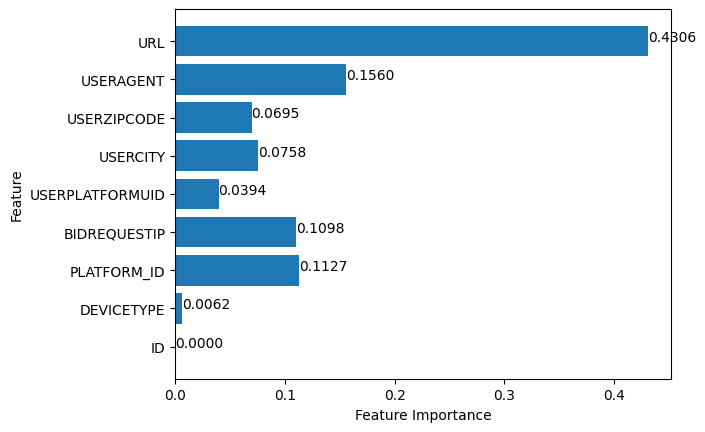

In [76]:
import matplotlib.pyplot as plt
plt.barh(range(len(importance)), importance, align = 'center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.yticks(range(len(importance)), feature_names)
for index, value in enumerate(importance):
    plt.text(value, index, f'{value:.4f}')
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(encoded_train_x,train_y)


RandomForestClassifier()

In [80]:
y_pred_rf = rf.predict(encoded_test_x)
y_pred_train_rf = rf.predict(encoded_train_x)

In [81]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Train F1 score is",f1_score(train_y, y_pred_train_rf, average='macro'))
print("Test F1 score is",f1_score(test_y, y_pred_rf, average = 'macro'))
print("Train F1 score is",f1_score(train_y, y_pred_train_rf))
print("Test F1 score is",f1_score(test_y, y_pred_rf))
print("Train Accuracy is",accuracy_score(train_y, y_pred_train_rf))
print("Test Accuracy is",accuracy_score(test_y, y_pred_rf))
print("Train Precision is",precision_score(train_y, y_pred_train_rf))
print("Test Precision is",precision_score(test_y, y_pred_rf))
print("Train Recall is",recall_score(train_y, y_pred_train_rf))
print("Test Recall is",recall_score(test_y, y_pred_rf))


Train F1 score is 0.9997211961394078
Test F1 score is 0.9597776871157598
Train F1 score is 0.9996096799375488
Test F1 score is 0.9431517940850591
Train Accuracy is 0.9997658004833027
Test Accuracy is 0.96665
Train Precision is 0.9993614530490617
Test Precision is 0.9659567039106145
Train Recall is 0.9998580301685892
Test Recall is 0.921398834304746


##**Countvectorizer For Keyword Column**

In [82]:
words = '|'.join(x.lower() for x in df.KEYWORDS.values).split('|')

In [83]:
pd.Series(words).value_counts()

clinical                 108476
urology                  104346
cardiology               102202
dermatology               99296
oncology                  98668
                          ...  
strongyloidiasis              1
h1n1 vaccine                  1
rheumatoid factor             1
porphyrias                    1
mitral valve prolapse         1
Length: 1216, dtype: int64

In [84]:
train_x = train_x.join(df.KEYWORDS,how = 'left')

In [85]:
test_x = test_x.join(df.KEYWORDS,how='left')

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary = True,max_features = 514)
vectorizer.fit(train_x.KEYWORDS)

CountVectorizer(binary=True, max_features=514)

In [87]:
train_x_sparse_matrix = vectorizer.transform(train_x.KEYWORDS)
test_x_sparse_matrix = vectorizer.transform(test_x.KEYWORDS)

In [88]:
df_transformed_train_x = pd.DataFrame.sparse.from_spmatrix(train_x_sparse_matrix, columns=vectorizer.get_feature_names_out(), index=train_x.index)
df_transformed_test_x = pd.DataFrame.sparse.from_spmatrix(test_x_sparse_matrix, columns=vectorizer.get_feature_names_out(), index=test_x.index)


In [89]:
encoded_test_x = encoded_test_x.join(df_transformed_test_x,how='left')

In [90]:
encoded_train_x = encoded_train_x.join(df_transformed_train_x, how = 'left')

#**Decision Tree**

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(encoded_train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTreeClassifier()

In [100]:
y_pred = dt.predict(encoded_test_x)
y_pred_train = dt.predict(encoded_train_x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [101]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Train F1 score is",f1_score(train_y, y_pred_train, average='macro'))
print("Test F1 score is",f1_score(test_y, y_pred, average = 'macro'))
print("Train Accuracy is",accuracy_score(train_y, y_pred_train))
print("Test Accuracy is",accuracy_score(test_y, y_pred))
print("Train Precision is",precision_score(train_y, y_pred_train))
print("Test Precision is",precision_score(test_y, y_pred))
print("Train Recall is",recall_score(train_y, y_pred_train))
print("Test Recall is",recall_score(test_y, y_pred))

Train F1 score is 1.0
Test F1 score is 0.9764049209329655
Train Accuracy is 1.0
Test Accuracy is 0.98045
Train Precision is 1.0
Test Precision is 0.9912495624781239
Train Recall is 1.0
Test Recall is 0.9432139883430475


In [102]:
from tabulate import tabulate
table_data = [
    ["Metric", "Train", "Test"],
    ["F1 Score", f1_score(train_y, y_pred_train, average='macro'), f1_score(test_y, y_pred, average = 'macro')],
    ["Accuracy", accuracy_score(train_y, y_pred_train), accuracy_score(test_y, y_pred)],
    ["Precision", precision_score(train_y, y_pred_train), precision_score(test_y, y_pred)],
    ["Recall", recall_score(train_y, y_pred_train), recall_score(test_y, y_pred)],
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+-----------+---------+----------+
| Metric    |   Train |     Test |
+===========+=========+==========+
| F1 Score  |       1 | 0.976405 |
+-----------+---------+----------+
| Accuracy  |       1 | 0.98045  |
+-----------+---------+----------+
| Precision |       1 | 0.99125  |
+-----------+---------+----------+
| Recall    |       1 | 0.943214 |
+-----------+---------+----------+


#**Random Forest**

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,max_features=3, random_state=42)

rf.fit(encoded_train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier(max_features=3, random_state=42)

In [104]:
y_pred_rf = rf.predict(encoded_test_x)
y_pred_train_rf = rf.predict(encoded_train_x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [105]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Train F1 score is",f1_score(train_y, y_pred_train_rf, average='macro'))
print("Test F1 score is",f1_score(test_y, y_pred_rf, average = 'macro'))
print("Train F1 score is",f1_score(train_y, y_pred_train_rf))
print("Test F1 score is",f1_score(test_y, y_pred_rf))
print("Train Accuracy is",accuracy_score(train_y, y_pred_train_rf))
print("Test Accuracy is",accuracy_score(test_y, y_pred_rf))
print("Train Precision is",precision_score(train_y, y_pred_train_rf))
print("Test Precision is",precision_score(test_y, y_pred_rf))
print("Train Recall is",recall_score(train_y, y_pred_train_rf))
print("Test Recall is",recall_score(test_y, y_pred_rf))


Train F1 score is 1.0
Test F1 score is 0.9974418152707499
Train F1 score is 1.0
Test F1 score is 0.9964199483806511
Train Accuracy is 1.0
Test Accuracy is 0.99785
Train Precision is 1.0
Test Precision is 0.9963369963369964
Train Recall is 1.0
Test Recall is 0.9965029142381349


In [106]:
from tabulate import tabulate
table_data = [
    ["Metric", "Train", "Test"],
    ["F1 Score", f1_score(train_y, y_pred_train_rf, average='macro'), f1_score(test_y, y_pred_rf, average = 'macro')],
    ["Accuracy", accuracy_score(train_y, y_pred_train_rf), accuracy_score(test_y, y_pred_rf)],
    ["Precision", precision_score(train_y, y_pred_train_rf), precision_score(test_y, y_pred_rf)],
    ["Recall",recall_score(train_y, y_pred_train_rf), recall_score(test_y, y_pred_rf)],
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+-----------+---------+----------+
| Metric    |   Train |     Test |
+===========+=========+==========+
| F1 Score  |       1 | 0.997442 |
+-----------+---------+----------+
| Accuracy  |       1 | 0.99785  |
+-----------+---------+----------+
| Precision |       1 | 0.996337 |
+-----------+---------+----------+
| Recall    |       1 | 0.996503 |
+-----------+---------+----------+


#**XGBoost**

In [107]:
import xgboost as xgb
dtrain = xgb.DMatrix(encoded_train_x, label=train_y)
dtest = xgb.DMatrix(encoded_test_x, label=test_y)

In [108]:
params = {
    'objective': 'multi:softmax',      # Classification task with multiple classes
    'eval_metric': 'merror',            # Evaluation metric for multi-class classification
    'num_class': len(set(train_y)),     # Number of classes in the target variable
    'max_depth': 3,                     # Maximum depth of the tree
    'learning_rate': 0.1,               # Learning rate
    'subsample': 0.8,                   # Fraction of training data to use in each boosting round
    'colsample_bytree': 0.8,            # Fraction of features to use in each boosting round
    'n_estimators': 100                 # Number of boosting rounds
}

In [109]:
model = xgb.train(params, dtrain, num_boost_round=100)
y_pred = model.predict(dtest)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:47:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [112]:
y_pred_xgb = model.predict(dtest)
y_pred_train_xgb = model.predict(dtrain)

In [113]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Train F1 score is",f1_score(train_y, y_pred_train_xgb, average='macro'))
print("Test F1 score is",f1_score(test_y, y_pred_xgb, average = 'macro'))
print("Train F1 score is",f1_score(train_y, y_pred_train_xgb))
print("Test F1 score is",f1_score(test_y, y_pred_xgb))
print("Train Accuracy is",accuracy_score(train_y, y_pred_train_xgb))
print("Test Accuracy is",accuracy_score(test_y, y_pred_xgb))
print("Train Precision is",precision_score(train_y, y_pred_train_xgb))
print("Test Precision is",precision_score(test_y, y_pred_xgb))
print("Train Recall is",recall_score(train_y, y_pred_train_xgb))
print("Test Recall is",recall_score(test_y, y_pred_xgb))


Train F1 score is 0.9239872226975708
Test F1 score is 0.9025672998237402
Train F1 score is 0.8941605199992991
Test F1 score is 0.8641057414291615
Train Accuracy is 0.9356909418014201
Test Accuracy is 0.91775
Train Precision is 0.8829146771849699
Test Precision is 0.8573770491803279
Train Recall is 0.9056965394853593
Test Recall is 0.8709408825978351
